# House Prices: Advanced Regression Techniques
Playground for the [House Prices: Advanced Regression Techniques Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Also my thoughts on how to tackle the problem.

Evaluation Metric: RMSE

## 1. Loading the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
train_df = pd.read_csv('./datasets/house_prices_train.csv')
test_df = pd.read_csv('./datasets/house_prices_test.csv') # for later use

In [3]:
# Displaying the head
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. EDA
Lots of things to do here. The basics revolve around a step process to do a number of things:
1. A basic summary of the data.
2. Check for missing data.
3. Gain insight into the data set by:  
    1. Sales Univariate analysis - Check the distribution of sales.
    2. Sales Bivariate analysis - Check whether the features, by themselves, have a relationship with the price.  
    3. Sales Multivariate analysis - Check whether the features as a group, have a relationship of some sort with Sales price.

### 2.1 A basic summary of the data.
With the help of pandas getting basic summary information about the data set can be quite easiy.

In [4]:
# getting the shape
train_df.shape

(1460, 81)

In [5]:
# Describe the dataset's only numerical columns
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Describes the variables of each category - whether its a int, float or an object. 
# If the variable is an object its safe to assume that it is a category of some kind.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2.2 Checking for missing data.
I enjoy the visual approach to checking for missing data - thus the `missingno` library.

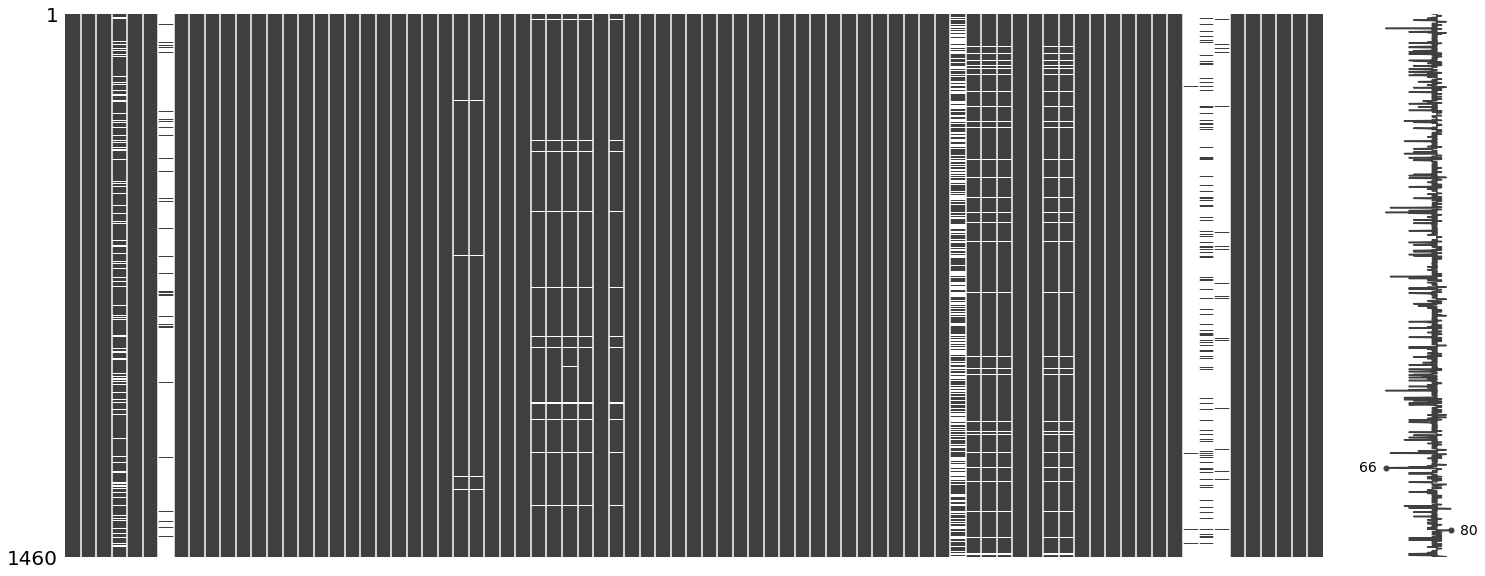

In [7]:
import missingno as msno
msno.matrix(train_df)

It seems the seventh column is completely gone, as well as the 7-through-9 counting from right to left. There is one column that has a lot of data missing as well. Let's get a more precise count.

In [8]:
# Getting the null values as counts
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# Getting the null values as a percentage
train_df[null_columns].isnull().sum() / train_df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

We see that the *Alley* column, the *FireplaceQu*, *PoolQC*, *Fence* and *MiscFeature* columns have the larges percent of missing values. I intend to drop them as from my limited (more like common sense) domain experience they do not appear to be valuable features.

In [10]:
train_df = train_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'], axis=1)

Let's check again for the missing features to see what's left.

In [11]:
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum() / train_df.shape[0]*100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

Let's check the types of the columns with missing data - the reason is that if the column is a category a mean value wouldn't make sense.

In [12]:
train_df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


It seems that only 3 columns are numerical data, whereas the other 8 are categories. They have to be treated differently.  
**Numerical Values:**  
Exploring the only numerical values that have to be treated differently. 

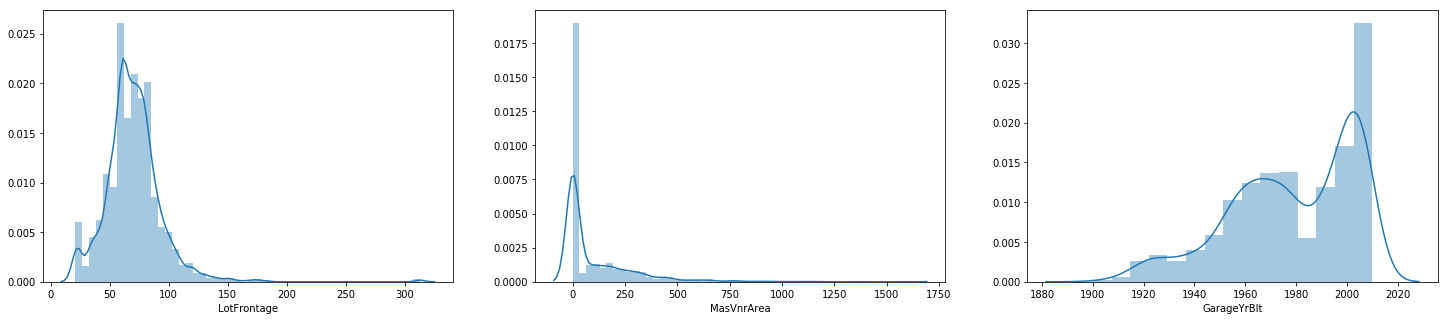

In [13]:
_, axes = plt.subplots(1, 3, figsize=(25,5))
sns.distplot(train_df[~np.isnan(train_df['LotFrontage'])]['LotFrontage'], ax=axes[0])
sns.distplot(train_df[~np.isnan(train_df['MasVnrArea'])]['MasVnrArea'], ax=axes[1])
sns.distplot(train_df[~np.isnan(train_df['GarageYrBlt'])]['GarageYrBlt'], ax=axes[2])
plt.show()

* *LotFrontage*: The distribution is left-skewed, with a long tail to the right as there are some values around ~300. A median value would be more appropriate than a mean to replace the `NAN`s.
* *MasVnrArea*: There is one clear dominant value, which conviniently is 0. To be sure the `NaN`s can be replaced with mode.
* *GarageYrBlt*: A safe bet would be to assume that the missing values can be taken directly from the date, that the building was built.  

In [14]:
# numerical replacements. 
train_df['LotFrontage'].fillna(float(train_df['LotFrontage'].median()), inplace=True)
# second method for replacing missing
train_df.loc[train_df['MasVnrArea'].isna(), 'MasVnrArea'] = float(train_df['MasVnrArea'].mode())
train_df.loc[train_df['GarageYrBlt'].isna(),'GarageYrBlt'] = train_df[train_df['GarageYrBlt'].isna()]['YearBuilt']

**Categorical Variables**  

In [15]:
def plot_features(feature_array, features_per_row = 5, size_touple = (25,5)):
    rows = int(np.ceil(len(feature_array)/features_per_row))
    _, axes = plt.subplots(rows, features_per_row, figsize=size_touple)
    
    col = 0
    row = 0
    
    for feature in feature_array:
        sns.countplot(x=train_df[feature], data=train_df, ax=axes[row, col])
        col += 1
        if col == features_per_row:
            col = 0
            row += 1
    
    plt.show()

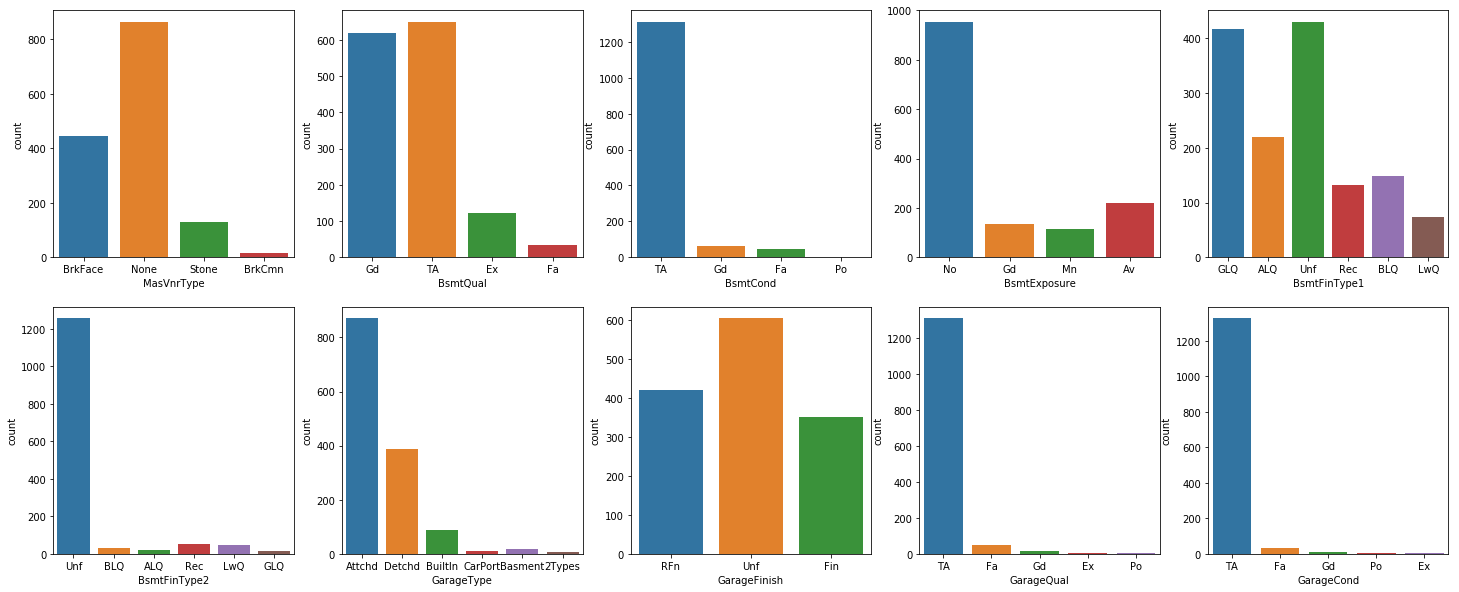

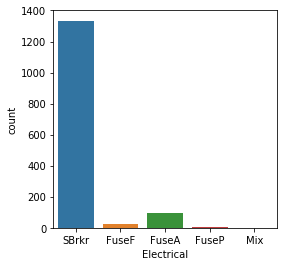

In [16]:
features = ['MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
plot_features(features, 5, (25,10))
_, axes2 = plt.subplots(figsize=(4,4))
sns.countplot(x=train_df['Electrical'], data=train_df)
plt.show()

* *MasVnrType*: Since the percent of missing values is small, the esiest approach is to take the mode - 'None'.
* *BsmtQual*: Looking at the number of values of BsmtQual for the chosen value of BsmtExposure (No) - the value would be the replacement for the missing is 'TA'.
* *BsmtCond*: Here the obvious value is 'TA', and it can be assumed that will be the replacement value.
* *BsmtExposure*: Considering the number of missing values it can be assumed that the missing values take the most occuring value as well - 'No'.
* *BsmtFinType1*: Looking at the other two most recurrent values for BsmtFinType2 and BsmtExposure, the most occuring value seems to be 'Unf' - so that is what we are going to assume (see below).
* *BsmtFinType2*: Again the most common value will be the way to go - 'Unf'
* *GarageType*: Taking the mode here as well - 'Attchd'.
* *GarageFinish*: Since the empty values for 'GarageType' with 'Attchd', the most common value for a 'GarageFinish' is 'RFn'. (See below).
* *GarageQual*: Again obvious value is 'TA', thus it will be used for the missing values.
* *GarageCond*: Once more the value is 'TA'.
* *Electrical*: The most common value is 'SBrkr', thus it will be used for the missing values.

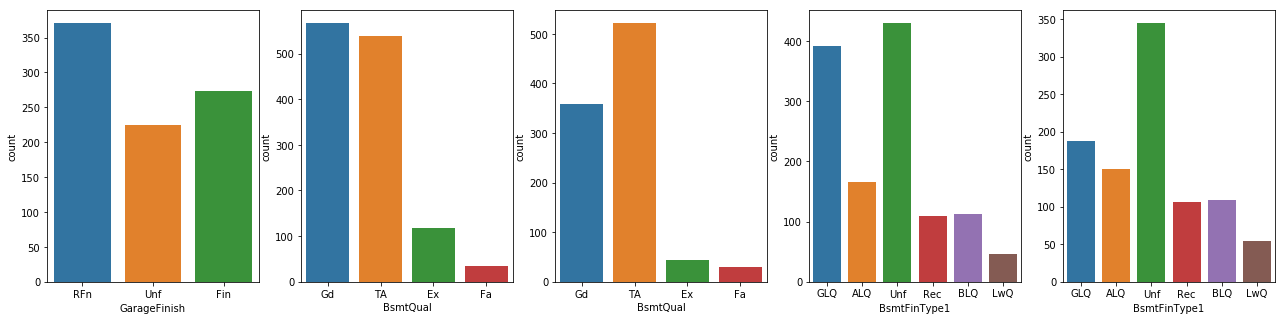

In [17]:
_, axes3 = plt.subplots(1, 5, figsize=(22, 5))
sns.countplot(x='GarageFinish', data=train_df[(train_df['GarageType'] == 'Attchd')], ax=axes3[0])
sns.countplot(x='BsmtQual', data=train_df[(train_df['BsmtFinType2'] == 'Unf')], ax=axes3[1])
sns.countplot(x='BsmtQual', data=train_df[train_df['BsmtExposure'] == 'No'], ax=axes3[2])
sns.countplot(x='BsmtFinType1', data=train_df[train_df['BsmtFinType2'] == 'Unf'], ax=axes3[3])
sns.countplot(x='BsmtFinType1', data=train_df[train_df['BsmtExposure'] == 'No'], ax=axes3[4])
plt.show()

In [18]:
# replacements for categorical variables
train_df['MasVnrType'].fillna('None', inplace=True)
train_df['BsmtQual'].fillna('TA', inplace=True)
train_df['BsmtCond'].fillna('TA', inplace=True)
train_df['BsmtExposure'].fillna('No', inplace=True)
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
train_df['GarageType'].fillna('Attchd', inplace=True)
train_df['GarageFinish'].fillna('RFn', inplace=True)
train_df['GarageQual'].fillna('TA', inplace=True)
train_df['GarageCond'].fillna('TA', inplace=True)
train_df['Electrical'].fillna('SBrkr', inplace=True)

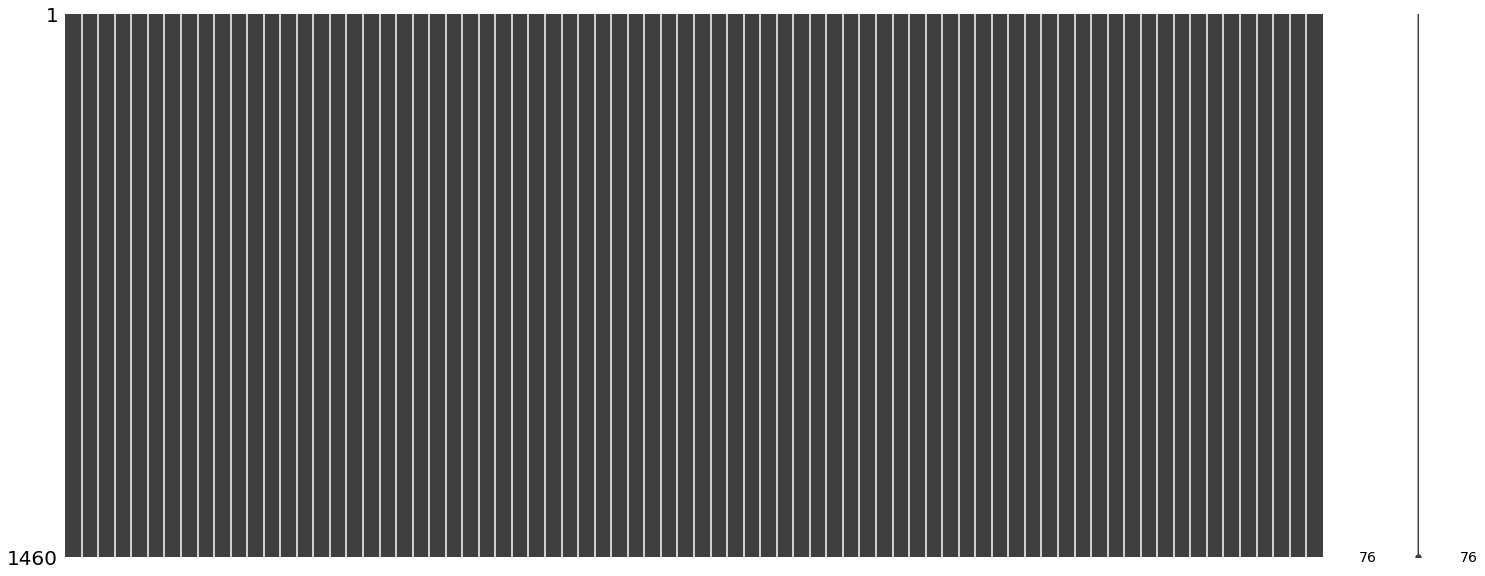

In [19]:
# final visual check for missing values
msno.matrix(train_df)

All clean :) 

### 2.3 Gaining Insight into the data.

#### 2.3.1 Sales Univariate analysis

`comentary placeholder`

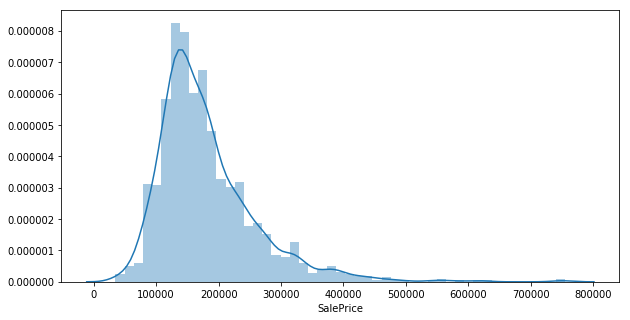

In [20]:
plt.subplots(figsize=(10,5))
sns.distplot(train_df['SalePrice'])
plt.show()

`comentary placeholder`

#### 2.3.2 Sales Bivariate analysis
A number of arbitrary features will be analyzed, with respect to the sale price.

In [21]:
def plot_scatter_price(feature_array, features_per_row = 5, size_touple = (25,5)):
    rows = int(np.ceil(len(feature_array)/features_per_row))
    _, axes = plt.subplots(rows, features_per_row, figsize=size_touple)
    
    col = 0
    row = 0
    
    for feature in feature_array:
        sns.scatterplot(x=train_df[feature], y='SalePrice', data=train_df, ax=axes[row, col])
        col += 1
        if col == features_per_row:
            col = 0
            row += 1
    
    plt.show()

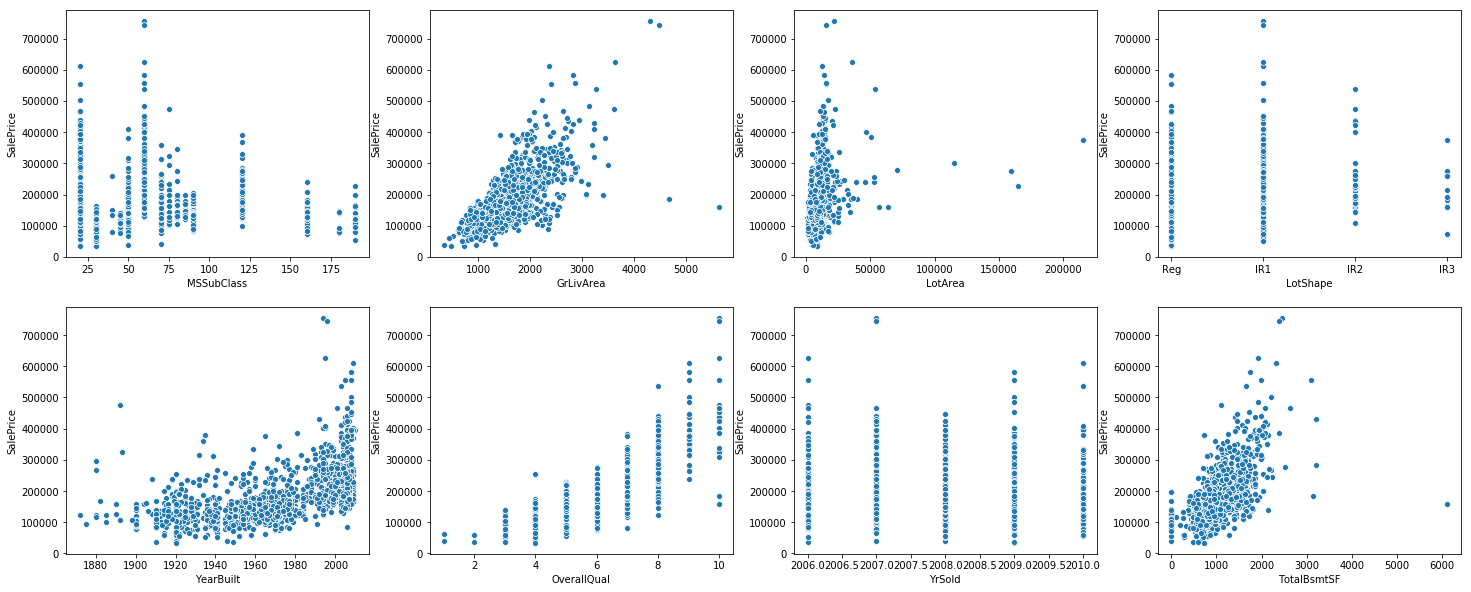

In [22]:
features_of_interest = ['MSSubClass', 'GrLivArea', 'LotArea', 'LotShape', 'YearBuilt', 'OverallQual', 'YrSold', 'TotalBsmtSF']
plot_scatter_price(features_of_interest, 4, size_touple = (25,10))

Looking at the displayed features it seems that the obvious relationship - Area - Price - is not so valid as the max price, given for a property, is barely 1/5th of the max. lot area.  
A clear linear relationship can be seen in relation to the size of the living area.  
On the other hand the year, that property was built, can be seen as an inverse bell curve - as old properties would even have a 'historical' value. On the other hand newer properties tend to go for a higher amount.  
Looking at the indicator of overall quality it seems that there is some king of a linear relationship.  
The year/month of the sale doesn't have an impact to the price.   
Last, but not least, the total basement square feet exhibits a clear linear relationship to the price. (Props to Mr. Marcelino for pointing this feature out in his [excellent kaggle kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) on the topic. Funny too!)

#### 2.3.3 Sales Multivariate analysis
Let's start with the correlation matrix to get an idea which features correlate with each other.

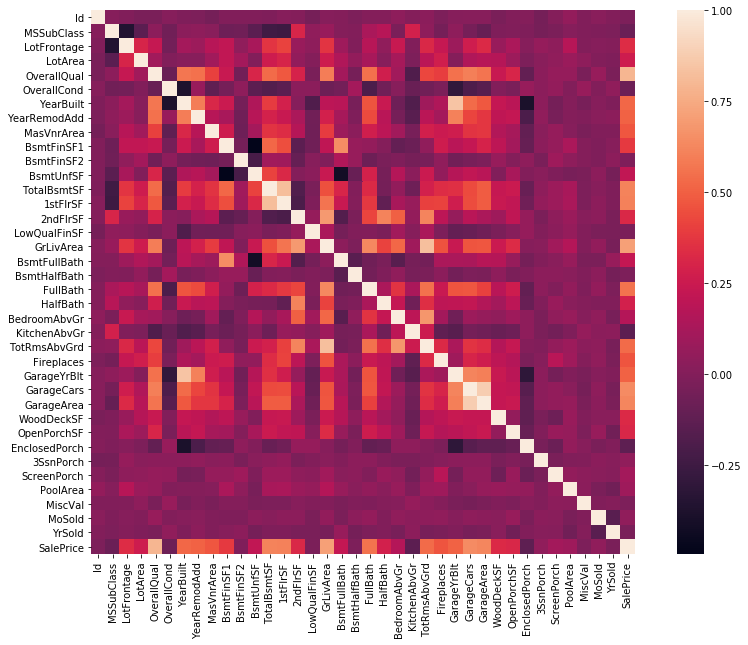

In [23]:
cormat = train_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cormat, square=True)
plt.show()

Some of the important features showed up from the correlation plot. From it - a straight relationship seems between Sales price and the features - OverallQual, GrLivAea, GarageArea, TotalBsmtSF, 1srtFlrSF, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars. Let's examine the relationship

sns.set()
feat_interest = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']
sns.pairplot(train_df[feat_interest])
plt.show()

`Comentary Placeholder`

## 4. Preprocessing the data
Making the data in a shape, suitable for the regressor(s). A function is needed that will encode all categorical variables into integers.
Since I don't like touching the original dataframe I will copy in each function.

In [49]:
from sklearn.preprocessing import LabelEncoder

def numerical_to_categorical(df, columns):
    ''' Transfomring columns into categorical by pandas methods.
        Returns the pandas dataframe.
    '''
    dfnew = df.copy()
    for column in columns:
        dfnew[column] = dfnew[column].astype(str)
        
    return dfnew
    
def encode_data(df, columns):
    '''Encoding the columns in the input
    '''
    dfnew = df.copy()
    
    encoder = LabelEncoder()
    
    for column in columns:
        encoder.fit(dfnew[column].values)
        dfnew[column] = encoder.transform(dfnew[column].values)
        
    return dfnew

In [56]:
numerical_to_categorical_features = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']

categorical_features = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
                       'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
                       'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
                       'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
                       'YrSold', 'MoSold']

In [57]:
train_df1 = numerical_to_categorical(train_df, numerical_to_categorical_features)
train_df.shape, train_df1.shape # quick check on the shapes - should be equal

((1460, 76), (1460, 76))

In [59]:
train_dfx = encode_data(train_df1, categorical_features)

KeyError: 'PoolQC'

## 4. Regression Algorithms
A number of regression algorithms will be evaluated to find the most suitable for evaluating the test set.

In [34]:
# importing the metric
from sklearn.metrics import mean_squared_error
# importing the regressors
from sklearn.linear_model import LinearRegression

In [ ]:
class Regressor:
    def __init__(self, train_x, train_y, test_x, test_y):
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
    
    def rmse(self, predicted_y):
        return np.sqrt(mean_squared_error(self.test_y, predicted_y))
    
    # Linear regression
    def linreg_fit(self):
        linreg = LinearRegression()
        self.linreg_fit = linreg.fit(self.train_x, self.train_y)
    
    def linreg_predict(self, testx = self.test_x):
        return self.linreg_fit.predict(testx)
    
    def linreg_rmse(self, testy = self.test_y):
        return self.rmse(testy, self.linear_predict())
    
    # 
    
    